## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함
- 변수 X,Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균화한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RSE : MSE의 양의 제곱근
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
    - 1에 가까울 수록 예측 정확도가 높음. (예측값 Variance / 실제값 Variance)로 구함
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../m2_분석라이브러리활용/pandas/dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [3]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan # NAN 으로 값 변경
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경

In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [5]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [6]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state = 11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

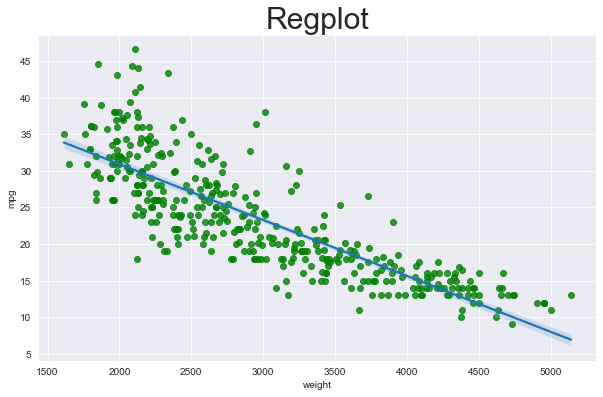

In [7]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(ax=axes,x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [9]:
# 기울기와 절편
print('기울기: ',lr.coef_)
print('절편: ',lr.intercept_)

기울기:  [-0.00762163]
절편:  45.971217704757684


In [10]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mae = round(mean_absolute_error(y_test, y_preds),2)
mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, R2: {R2}')

mae: 3.43, mse: 22.17, rmse: 4.71, R2: 0.64


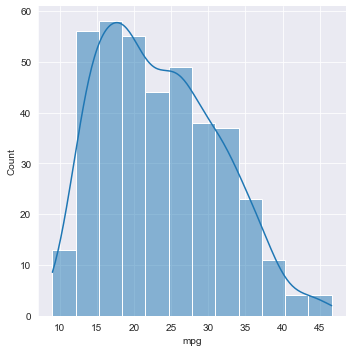

In [11]:
sns.displot(y,kde=True)

<AxesSubplot:ylabel='Density'>

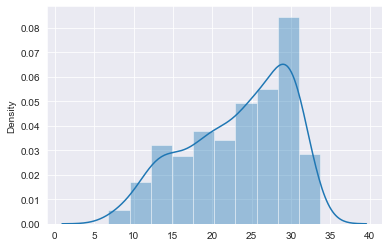

In [12]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

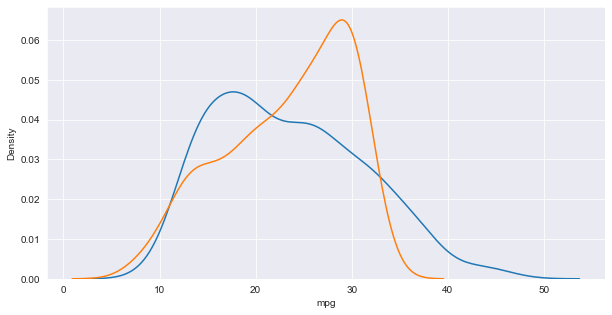

In [13]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형과는 무관

In [14]:
X_train.shape

(274, 1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train.shape)
print(X_train_poly.shape) # 절편까지 3개 항..

(274, 1)
(274, 3)


In [17]:
X_train_poly[:3]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06]])

In [18]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)

In [20]:
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mae = round(mean_absolute_error(y_test, y_preds),2)
mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mae: {mae}, mse: {mse}, rmse: {rmse}, R2: {R2}')

mae: 3.39, mse: 22.43, rmse: 4.74, R2: 0.64


In [21]:
print(lr.coef_)
print(lr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.12274142723446


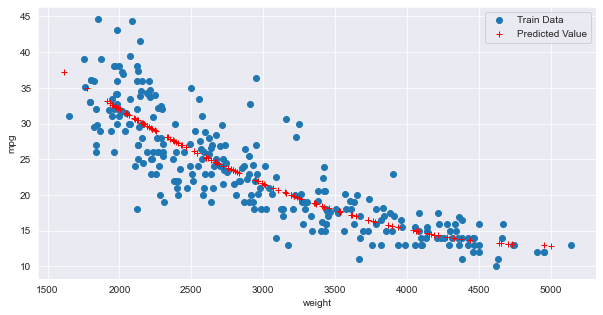

In [22]:
y_hat_test = lr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [23]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화 하세요.
# 0~1사이 균일분포에서 랜덤추출
import numpy as np
np.random.seed(42)
m=100
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [24]:
X_test_poly[:5]

array([[1.000000e+00, 2.190000e+03, 4.796100e+06],
       [1.000000e+00, 2.665000e+03, 7.102225e+06],
       [1.000000e+00, 2.370000e+03, 5.616900e+06],
       [1.000000e+00, 2.755000e+03, 7.590025e+06],
       [1.000000e+00, 4.060000e+03, 1.648360e+07]])

In [25]:
X_test[:5]

,weight
240,2190
390,2665
391,2370
236,2755
222,4060


In [26]:
y_preds[:5]

array([29.7291156 , 24.62997456, 27.68868798, 23.76736165, 14.96630252])

In [27]:
y_test[:5]

240    30.5
390    32.0
391    36.0
236    25.5
222    17.0
Name: mpg, dtype: float64

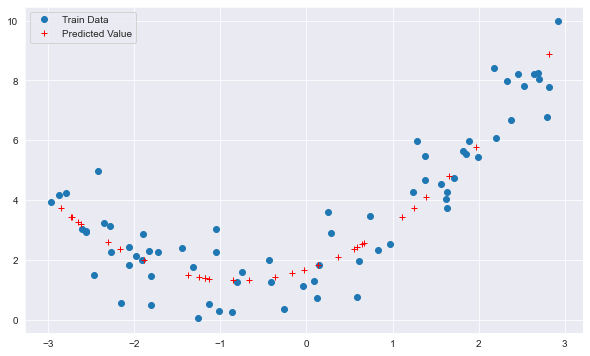

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

# 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성

In [29]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('mpg',axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [31]:
# Q. mse, rmsem r_square,(r2_score). 기울기, 절편
from sklearn.metrics import mean_squared_error , r2_score, mean_absolute_error

mse = round(mean_squared_error(y_test, y_preds),2)
rmse = round(np.sqrt(mse),2)
R2 = round(r2_score(y_test, y_preds),2)
print(f'mse: {mse}, rmse: {rmse}, R2_score: {R2}, \n기울기: {[round(i,2) for i in lr.coef_]} \n절편: {round(lr.intercept_,2)}')

mse: 17.33, rmse: 4.16, R2_score: 0.69, 
기울기: [-0.61, -0.04, -0.01] 
절편: 46.41


In [32]:
y_preds.shape

(118,)

In [33]:
X_test

,cylinders,horsepower,weight
243,3,110.0,2720
371,4,84.0,2525
300,8,90.0,3420
345,4,60.0,1760
265,8,140.0,4080
...,...,...,...
384,4,67.0,1965
20,4,87.0,2672
189,8,120.0,3962
60,4,90.0,2408


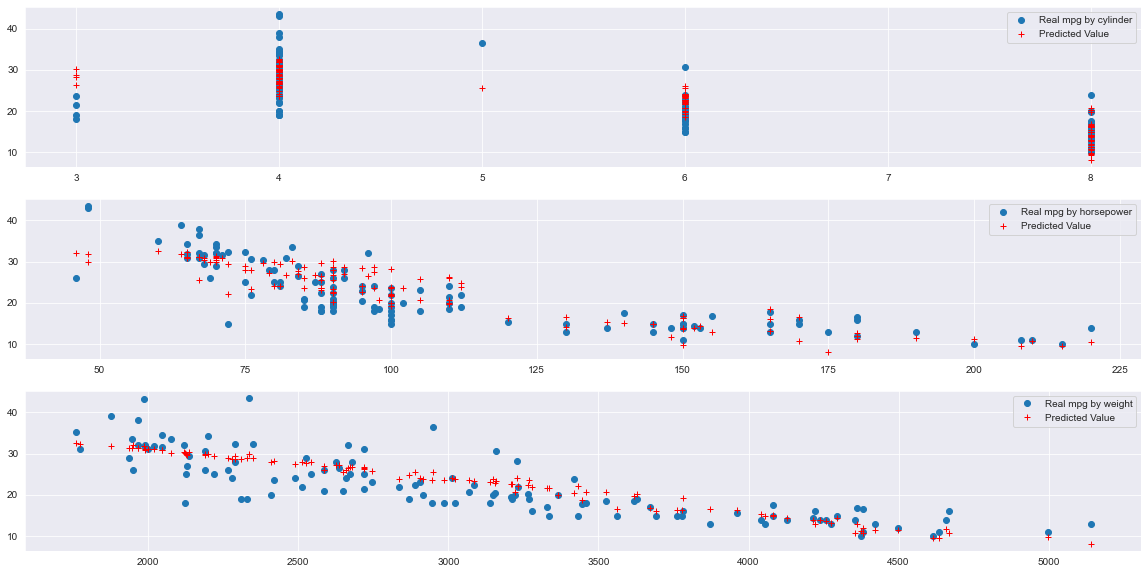

In [34]:
# [과제] y_test, y_hat을 하나의 그래프로 비교하여 시각화

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(X_test.iloc[:,0],y_test,'o',label='Real mpg by cylinder')
ax1.plot(X_test.iloc[:,0],y_preds,'r+', label='Predicted Value')
ax1.legend(loc='best')

ax2.plot(X_test.iloc[:,1],y_test,'o',label='Real mpg by horsepower')
ax2.plot(X_test.iloc[:,1],y_preds,'r+', label='Predicted Value')
ax2.legend(loc='best')

ax3.plot(X_test.iloc[:,2],y_test,'o',label='Real mpg by weight')
ax3.plot(X_test.iloc[:,2],y_preds,'r+', label='Predicted Value')
ax3.legend(loc='best')

plt.show()
plt.close()

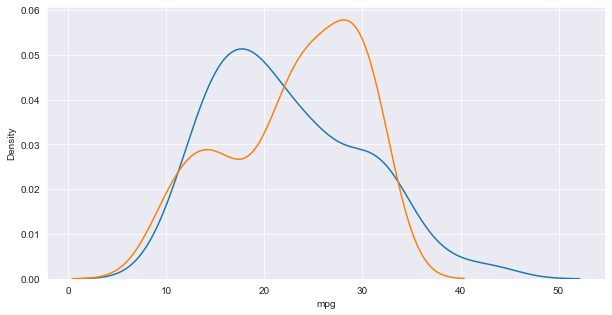

In [43]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,label='y')
ax2 = sns.distplot(y_preds,hist=False,label='y_hat')
plt.show()
plt.close()

[과제] 아래 Boston 데이터 셋으로 보스턴 주택가격 예측 모델을 만들고 평가하세요.

In [47]:
from sklearn.datasets import load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


https://m.blog.naver.com/taewwon/221588342602

<AxesSubplot:>

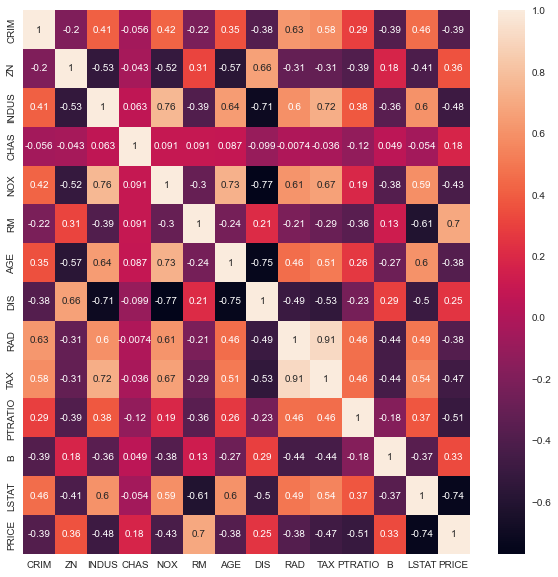

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

hc = boston_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hc,annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

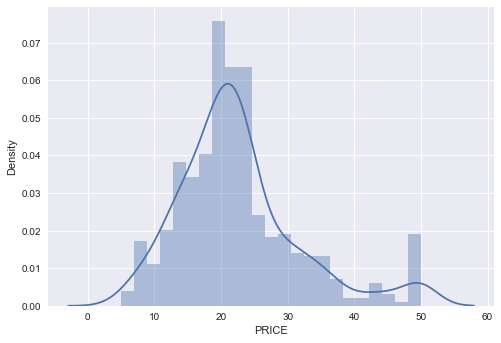

In [49]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

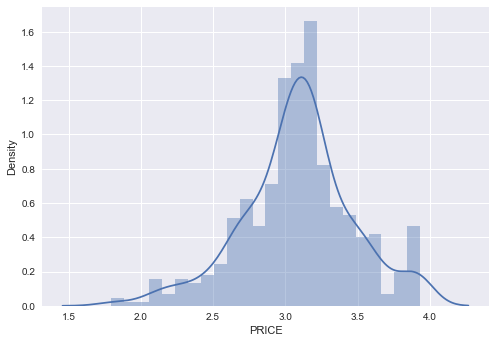

In [50]:
import numpy as np
y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [4]:
# 변수 선택
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']

X_train , X_test , y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}')

MSE: 25.934, RMSE: 5.093, R2: 0.717


In [7]:
print(f'절편값: {lr.intercept_}\n회귀계수: {[round(i,2) for i in lr.coef_]}')

절편값: 36.90325547684519
회귀계수: [3.17, -0.0, 0.07, -14.71, 0.03, -1.19, -0.64, 0.09]


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


다중공산성을 진단 : 분산팽창계수(VIF가 10보다 크면 다중공산성이 있다고 판단)

릿지 회귀

In [8]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-10.343 -29.209 -38.773 -82.643 -33.638]
 5 folds 의 개별 RMSE scores :  [3.216 5.405 6.227 9.091 5.8  ]
 5 folds 의 평균 RMSE : 5.948 


**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [20]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f}\n')

alpha: 0
RMSE: [3.4  5.23 6.23 9.47 5.94]
평균 RMSE: 6.051

alpha: 0.1
RMSE: [3.38 5.23 6.22 9.46 5.93]
평균 RMSE: 6.044

alpha: 1
RMSE: [3.28 5.27 6.18 9.42 5.92]
평균 RMSE: 6.013

alpha: 10
RMSE: [3.22 5.4  6.23 9.09 5.8 ]
평균 RMSE: 5.948

alpha: 100
RMSE: [3.52 5.75 6.75 7.8  5.24]
평균 RMSE: 5.811



**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

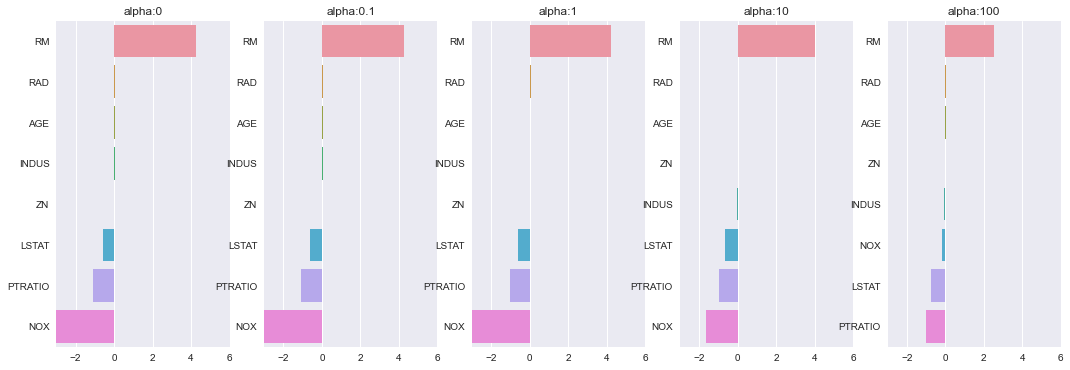

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 저장할 그릇  
coeff_df = pd.DataFrame()

for i, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X , y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[i].set_title(colname)
    axs[i].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[i])

plt.show()

[과제] 모델이름과 alpha 리스트를 대입하면 각 alpha값 별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.
- lasso, [0.07,0.1,0.5,1.3]
- elasticnet, [0.07,0.1,0.5,1.3]

**alpha 값에 따른 컬럼별 회귀계수 출력**

In [46]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.238779,4.239623,4.234121,4.007404,2.512061
RAD,0.058445,0.056112,0.043051,0.026046,0.039056
AGE,0.033332,0.032548,0.028181,0.023078,0.032377
INDUS,0.031553,0.027597,0.005014,-0.033521,-0.069504
ZN,-0.008229,-0.007890,-0.005936,-0.002121,0.004918
LSTAT,-0.606048,-0.606815,-0.611840,-0.634031,-0.733959
PTRATIO,-1.104027,-1.095902,-1.050258,-0.987428,-0.995755
NOX,-11.074172,-10.458496,-6.972494,-1.617537,-0.188359


In [40]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data = None, y_data = None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('------- ', model_name, ' -------')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data, y_data, scoring="neg_mean_squared_error", cv = 5)
        rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f} ')
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_data)

        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data.columns)
            colname='alpha:'+ str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [43]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=alphas, X_data=X, y_data=y)
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = alphas, X_data=X, y_data=y)

-------  Lasso  -------
alpha 0.07
RMSE: [3.17 5.39 6.26 9.31 5.86]
평균 RMSE: 5.998 
alpha 0.1
RMSE: [3.19 5.41 6.33 9.25 5.82]
평균 RMSE: 5.999 
alpha 0.5
RMSE: [3.46 5.68 7.26 8.46 5.4 ]
평균 RMSE: 6.054 
alpha 1
RMSE: [3.84 6.09 7.77 7.73 5.  ]
평균 RMSE: 6.085 
alpha 3
RMSE: [4.26 6.09 8.62 7.07 4.75]
평균 RMSE: 6.157 
-------  ElasticNet  -------
alpha 0.07
RMSE: [3.21 5.44 6.3  9.05 5.77]
평균 RMSE: 5.955 
alpha 0.1
RMSE: [3.24 5.47 6.38 8.9  5.71]
평균 RMSE: 5.940 
alpha 0.5
RMSE: [3.58 5.77 7.14 7.81 5.18]
평균 RMSE: 5.896 
alpha 1
RMSE: [3.87 5.94 7.72 7.35 4.91]
평균 RMSE: 5.957 
alpha 3
RMSE: [4.25 6.05 8.32 7.09 4.67]
평균 RMSE: 6.075 


In [45]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,4.086844,3.991926,2.731116,1.152692,0.000000
AGE,0.020217,0.020774,0.027730,0.036648,0.030889
RAD,0.014574,0.014129,0.008604,0.001507,-0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ZN,-0.000613,-0.000000,0.006849,0.016040,0.031017
INDUS,-0.038434,-0.038484,-0.040171,-0.041746,-0.016339
LSTAT,-0.629861,-0.635686,-0.712994,-0.809830,-0.867831
PTRATIO,-0.945481,-0.941245,-0.888191,-0.820322,-0.399455


In [44]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.855576,3.682434,2.082871,1.038456,0.000000
AGE,0.021983,0.023046,0.033367,0.039228,0.036264
RAD,0.019085,0.020351,0.024360,0.014714,-0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
ZN,-0.000027,0.000466,0.008822,0.016053,0.029349
INDUS,-0.043734,-0.046001,-0.060007,-0.061277,-0.047126
LSTAT,-0.645507,-0.656602,-0.757044,-0.817840,-0.856336
PTRATIO,-0.958580,-0.959653,-0.927169,-0.843336,-0.498135
